<a href="https://colab.research.google.com/github/VReddy551/Adidas-Sales-DashBoard/blob/main/Company_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Of Company Bankruptcy

This project aims to predict company bankruptcy using financial data to help banks and investors make better decisions. This understanding guides the data collection, analysis, and modeling process to ensure the solution aligns with the company's goals. Ultimately, it ensures that the predictions will help businesses make informed decisions about potential financial risks.

# Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.feature_selection import SelectFromModel





# Load the dataset

In [ ]:
data = pd.read_csv("/content/Company Bankruptcy.csv")
# Set display options to show ALL rows/columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



# Descriptive Statistics

In [ ]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                               6819.000000   
mean      0.032263                                                  0.505180   
std       0.176710                                                  0.060686   
min       0.000000                                                  0.000000   
25%       0.000000                                                  0.476527   
50%       0.000000                                                  0.502706   
75%       0.000000                                                  0.535563   
max       1.000000                                                  1.000000   

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                         6819.000000   
mean                                             0.553589   
std                                              0.061595   
min                                              0.000000   
25%                                              0.527277   
50%                                              0.552278   
75%                                              0.584105   
max                                              1.000000   

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

# Correlation Matrix

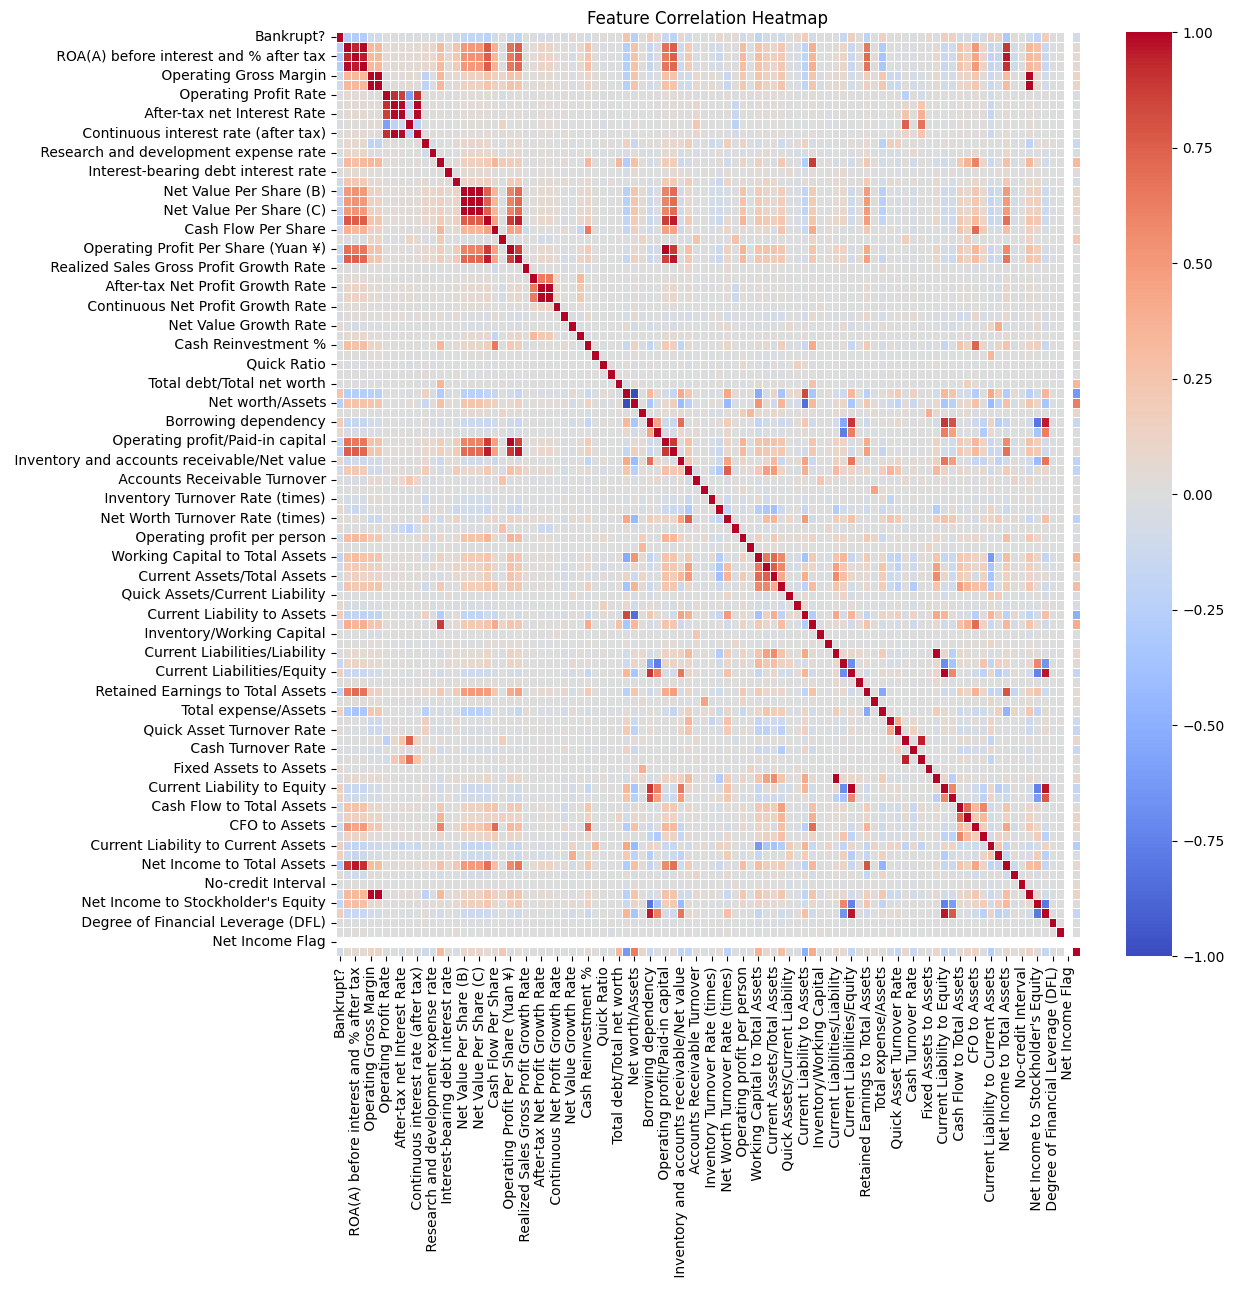

In [ ]:
plt.figure(figsize=(12, 12))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
bankrupt_corr = corr['Bankrupt?'].drop('Bankrupt?')
top_20_corr = bankrupt_corr.abs().sort_values(ascending=False).head(20)
top_20 = bankrupt_corr.loc[top_20_corr.index]
print(top_20)

Net Income to Total Assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
Net worth/Assets                                          -0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                   -0.219560
Retained Earnings to Total Assets                         -0.217779
Net profit before tax/Paid-in capital                     -0.207857
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Current Liability to Assets                                0.194494
Working Capital to Total Assets                           -0.193083
Net Income to Stockholder's Equity                        -0.180987
Borrowing dependency                                       0.176543
Current Liability to Current Assets             

# Checking Missing Values & Duplicates

In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)
print("\nTotal missing values:", missing_values.sum())



Missing values per column:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                             

In [ ]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


# Standardization of Column Names

In [ ]:
data.columns = (
    data.columns.str.strip()
               .str.replace("\?", "", regex=True)
               .str.replace(" ", "_")
               .str.lower()
)

# Verify changes
print("Cleaned columns:", data.columns.tolist())

Cleaned columns: ['bankrupt', 'roa(c)_before_interest_and_depreciation_before_interest', 'roa(a)_before_interest_and_%_after_tax', 'roa(b)_before_interest_and_depreciation_after_tax', 'operating_gross_margin', 'realized_sales_gross_margin', 'operating_profit_rate', 'pre-tax_net_interest_rate', 'after-tax_net_interest_rate', 'non-industry_income_and_expenditure/revenue', 'continuous_interest_rate_(after_tax)', 'operating_expense_rate', 'research_and_development_expense_rate', 'cash_flow_rate', 'interest-bearing_debt_interest_rate', 'tax_rate_(a)', 'net_value_per_share_(b)', 'net_value_per_share_(a)', 'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_seasons', 'cash_flow_per_share', 'revenue_per_share_(yuan_¥)', 'operating_profit_per_share_(yuan_¥)', 'per_share_net_profit_before_tax_(yuan_¥)', 'realized_sales_gross_profit_growth_rate', 'operating_profit_growth_rate', 'after-tax_net_profit_growth_rate', 'regular_net_profit_growth_rate', 'continuous_net_profit_growth_rate', 'tota

# Dropping Irrelavant feature

In [ ]:
# Drop the 'Net Income Flag' column
data = data.drop(columns=['net_income_flag'])



# Outlier detection

In [ ]:

def plot_boxplots_grid(df, max_cols=4, figsize=(20, 60)):
    """
    Plots a grid of boxplots for all numeric columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame
    - max_cols: maximum number of plots per row
    - figsize: size of the entire figure (width, height)
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(numeric_cols)
    rows = (num_plots // max_cols) + (1 if num_plots % max_cols else 0)

    plt.figure(figsize=figsize)

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, max_cols, i)
        sns.boxplot(y=df[col])
        plt.title(col[:20] + ('...' if len(col) > 20 else ''))
        plt.tight_layout()

    plt.show()


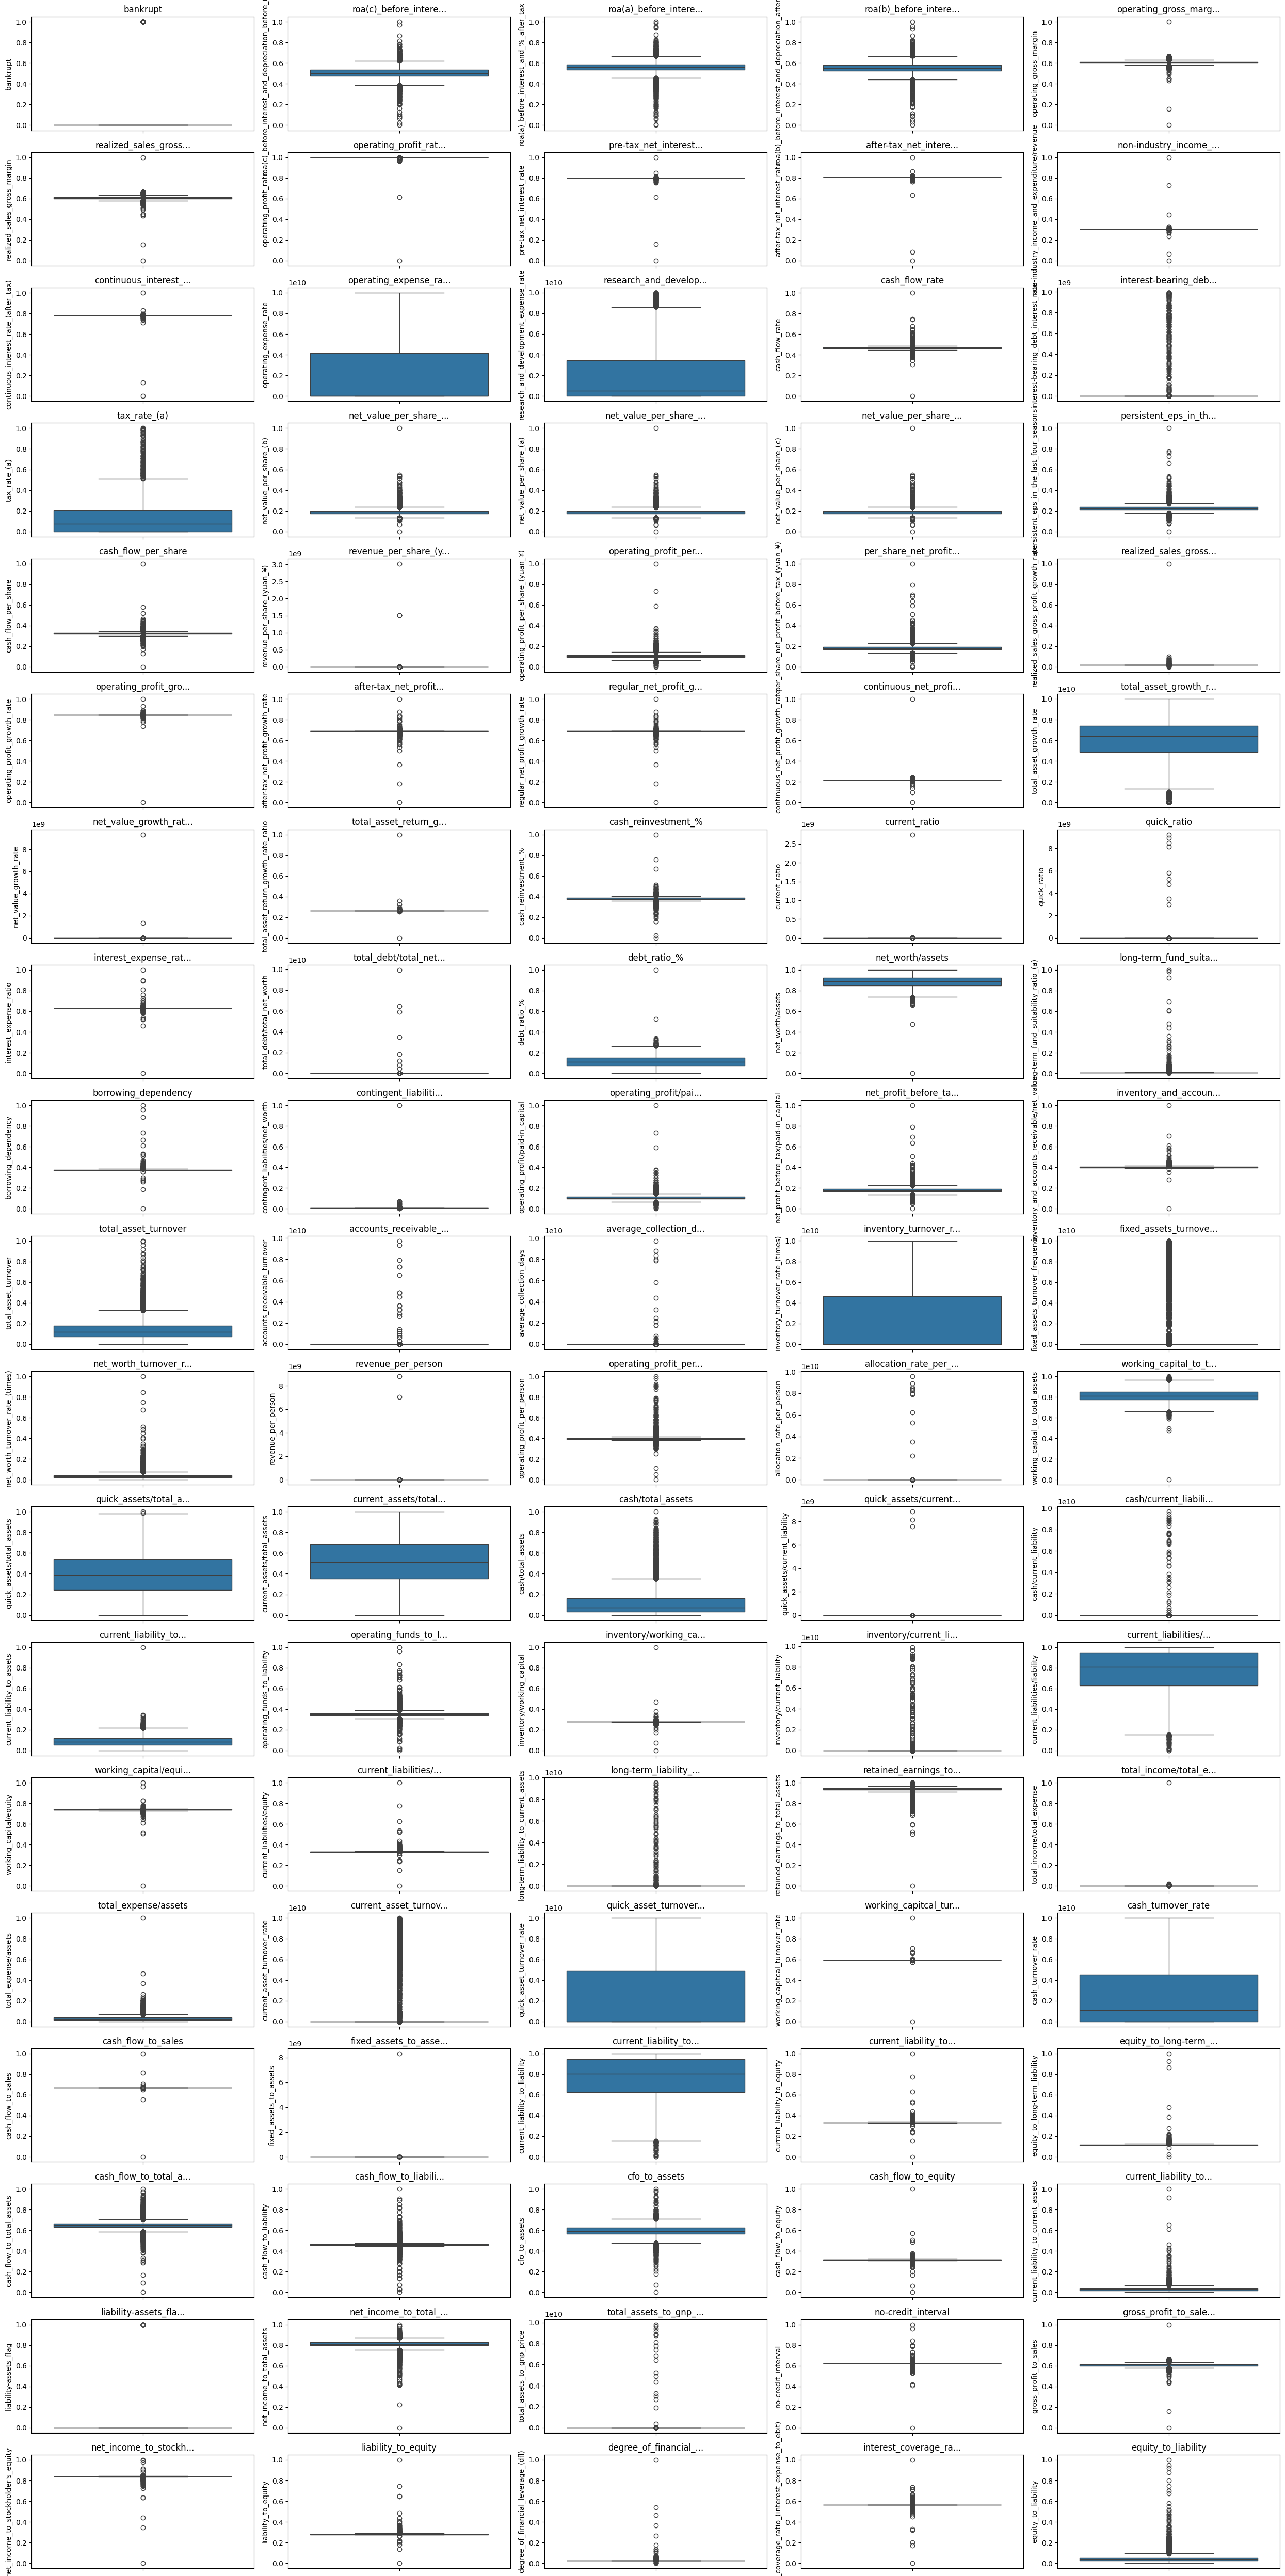

In [ ]:
plot_boxplots_grid(data, max_cols=5, figsize=(25,50))

In [ ]:
# Function to cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                         np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df


# Get numeric columns and remove the target
numeric_cols = list(data.select_dtypes(include=['number']).columns)
if 'bankrupt' in numeric_cols:
    numeric_cols.remove('bankrupt')

# Apply outlier capping to each numeric column
for col in numeric_cols:
    data = cap_outliers(data, col)


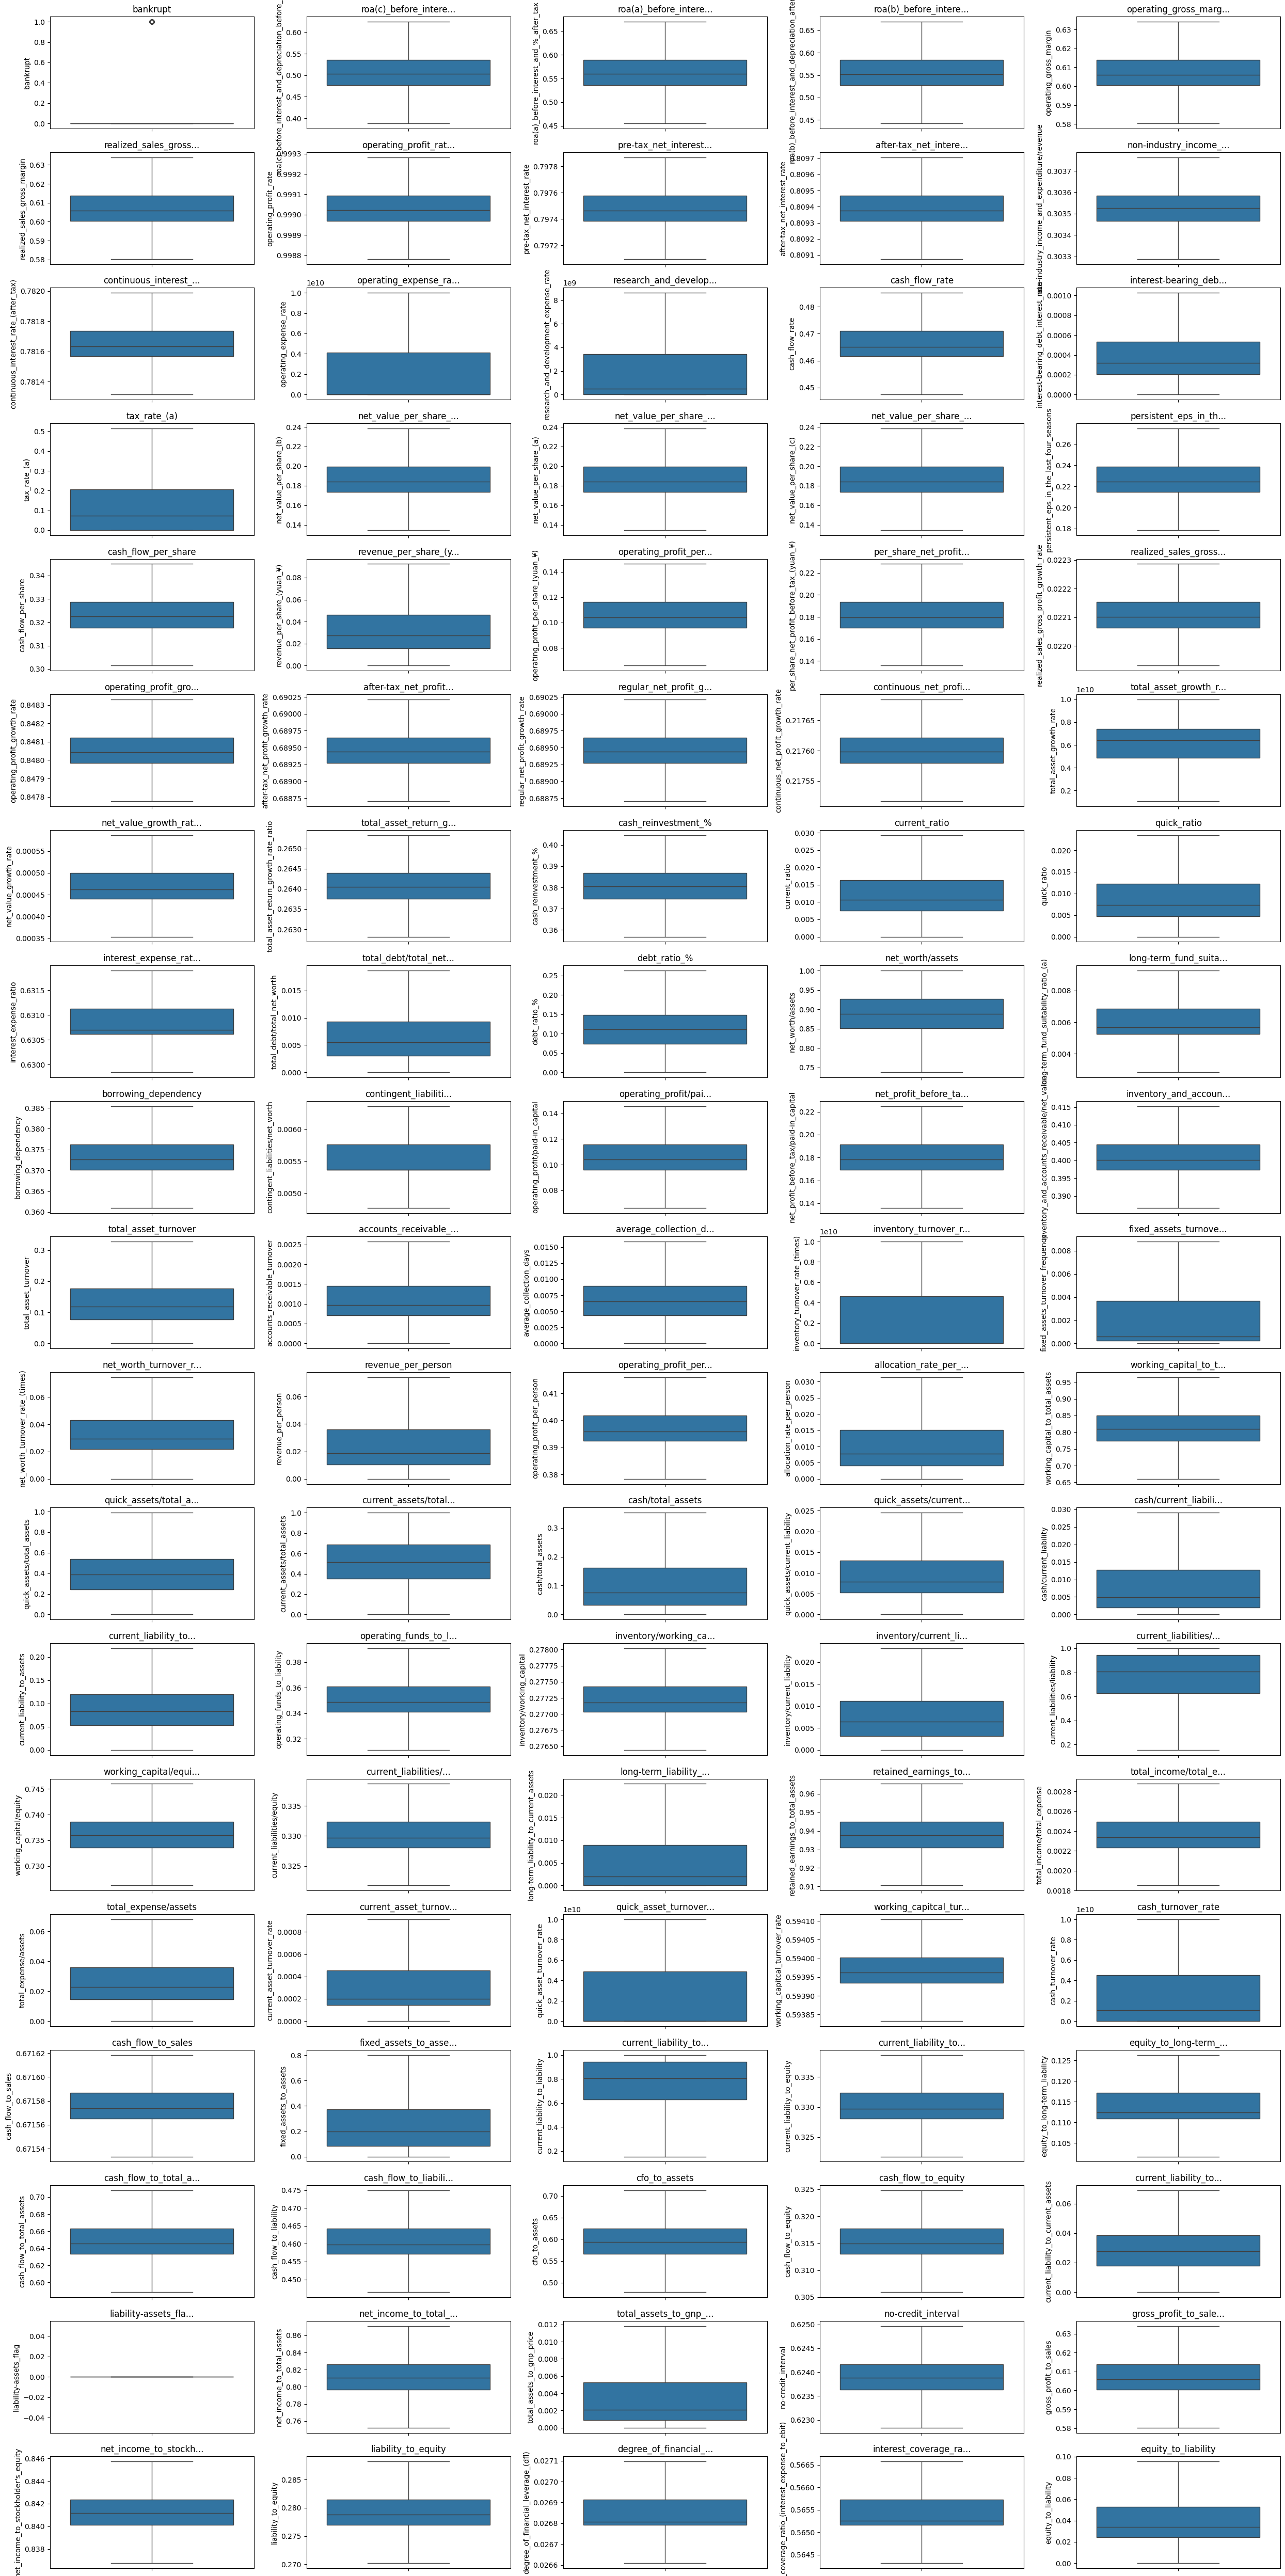

In [ ]:
plot_boxplots_grid(data, max_cols=5, figsize=(25, 50))

In [ ]:
data.to_csv("cleaned_data.csv", index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Split the data into test and train sets

In [ ]:
X = data.drop('bankrupt', axis=1)
y = data['bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Scale the Data

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only on the training set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Addressing class imbalance using SMOTE

In [ ]:
# Method1 SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Addressing class imbalance using Random Undersampling

In [ ]:
#Method2 Random Undersampling

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)


# Check class Balance

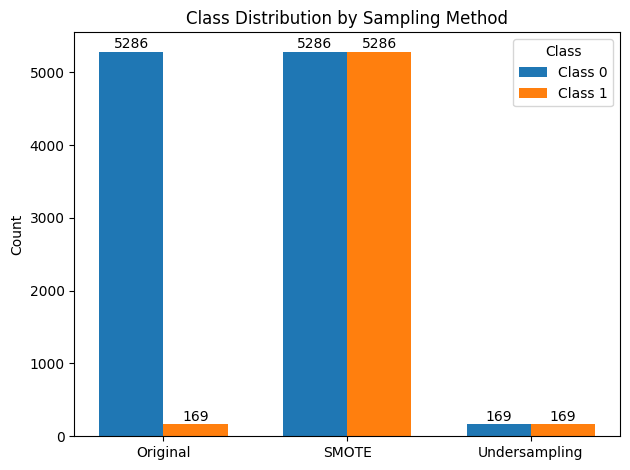

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Class distributions
original_counts = Counter(y_train)
smote_counts = Counter(y_train_smote)
rus_counts = Counter(y_train_rus)

# Prepare values
labels = ['Class 0', 'Class 1']
methods = ['Original', 'SMOTE', 'Undersampling']
data_groups = [
    [original_counts[0], original_counts[1]],
    [smote_counts[0], smote_counts[1]],
    [rus_counts[0], rus_counts[1]]
]

# Setup
x = np.arange(len(methods))  # 3 groups
bar_width = 0.35

fig, ax = plt.subplots()

# Plot bars side-by-side for each group
bars0 = ax.bar(x - bar_width/2, [group[0] for group in data_groups], width=bar_width, label='Class 0')
bars1 = ax.bar(x + bar_width/2, [group[1] for group in data_groups], width=bar_width, label='Class 1')

# Add text labels
for bars in [bars0, bars1]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 5, str(yval), ha='center', va='bottom')

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_ylabel('Count')
ax.set_title('Class Distribution by Sampling Method')
ax.legend(title="Class")

plt.tight_layout()
plt.show()


# Feature Selection - Lasso + Smote

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np

# Fit Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_smote, y_train_smote)

# Get selected features (non-zero coefficients)
non_zero_mask = lasso.coef_ != 0
selected_features = X.columns[non_zero_mask]
importance = (lasso.coef_[non_zero_mask])

sorted_idx = np.argsort(importance)
selected_features = selected_features[sorted_idx]
importance = importance[sorted_idx]


# Print selected features and their importance
print("Selected features after SMOTE using Lasso:")
for feature, imp in zip(selected_features, importance):
    print(f"{feature}: {imp:.4f}")

print("Number of selected features:", len(selected_features))
selected_features_lasso_smote = selected_features


Selected features after SMOTE using Lasso:
non-industry_income_and_expenditure/revenue: -0.0594
persistent_eps_in_the_last_four_seasons: -0.0551
cash_turnover_rate: -0.0471
inventory_and_accounts_receivable/net_value: -0.0334
cash_flow_to_sales: -0.0291
revenue_per_share_(yuan_¥): -0.0249
degree_of_financial_leverage_(dfl): -0.0200
net_income_to_stockholder's_equity: -0.0184
roa(c)_before_interest_and_depreciation_before_interest: -0.0129
continuous_net_profit_growth_rate: -0.0087
realized_sales_gross_profit_growth_rate: -0.0074
retained_earnings_to_total_assets: -0.0053
inventory/current_liability: -0.0023
current_liability_to_liability: 0.0003
allocation_rate_per_person: 0.0008
research_and_development_expense_rate: 0.0026
fixed_assets_turnover_frequency: 0.0035
total_assets_to_gnp_price: 0.0062
current_liabilities/liability: 0.0085
revenue_per_person: 0.0127
total_expense/assets: 0.0264
interest-bearing_debt_interest_rate: 0.0396
average_collection_days: 0.0430
borrowing_dependency:

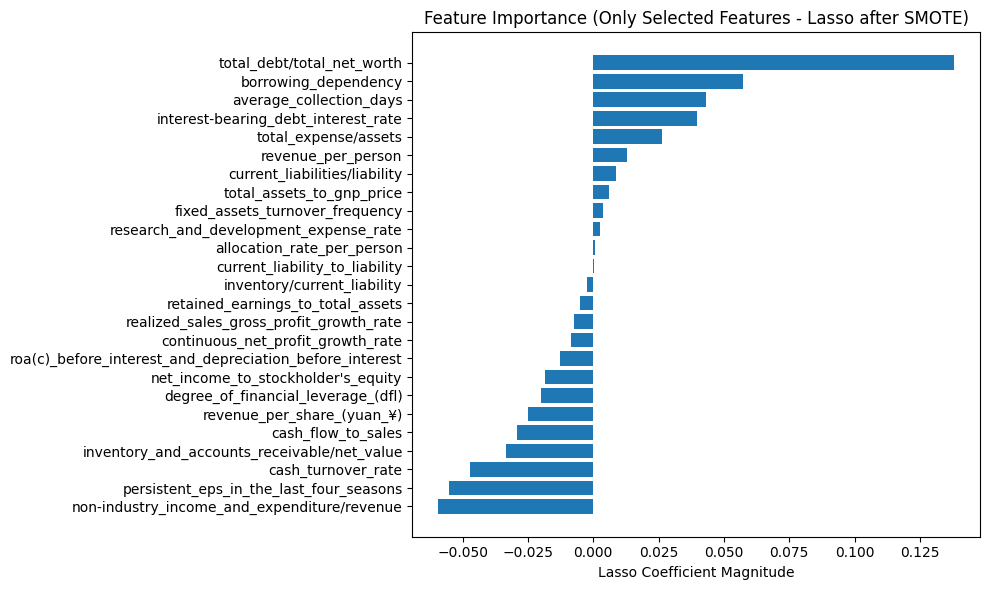

In [ ]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(selected_features, importance)
plt.xlabel("Lasso Coefficient Magnitude")
plt.title("Feature Importance (Only Selected Features - Lasso after SMOTE)")
plt.tight_layout()
plt.show()

# Feature Selection - Lasso + Random Undersampling

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np

# Fit Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_rus, y_train_rus)

# Get selected features (non-zero coefficients)
non_zero_mask = lasso.coef_ != 0
selected_features_rus = X.columns[non_zero_mask]
importance = (lasso.coef_[non_zero_mask])

sorted_idx = np.argsort(importance)
selected_features_rus = selected_features_rus[sorted_idx]
importance = importance[sorted_idx]


# Print selected features and their importance
print("Selected features after SMOTE using Lasso:")
for feature, imp in zip(selected_features_rus, importance):
    print(f"{feature}: {imp:.4f}")

print("Number of selected features:", len(selected_features_rus))
selected_features_lasso_rus = selected_features_rus

Selected features after SMOTE using Lasso:
persistent_eps_in_the_last_four_seasons: -0.0540
cash_turnover_rate: -0.0502
non-industry_income_and_expenditure/revenue: -0.0350
retained_earnings_to_total_assets: -0.0297
inventory_and_accounts_receivable/net_value: -0.0288
cash_flow_to_sales: -0.0282
roa(c)_before_interest_and_depreciation_before_interest: -0.0282
quick_ratio: -0.0258
net_value_per_share_(b): -0.0222
degree_of_financial_leverage_(dfl): -0.0189
fixed_assets_to_assets: -0.0182
inventory/current_liability: -0.0140
quick_asset_turnover_rate: -0.0124
total_asset_growth_rate: -0.0104
after-tax_net_profit_growth_rate: -0.0086
continuous_net_profit_growth_rate: -0.0066
regular_net_profit_growth_rate: -0.0060
current_asset_turnover_rate: -0.0059
inventory/working_capital: -0.0043
interest_expense_ratio: -0.0037
revenue_per_share_(yuan_¥): -0.0017
current_liability_to_liability: 0.0002
cash/current_liability: 0.0006
current_liabilities/liability: 0.0015
allocation_rate_per_person: 0.

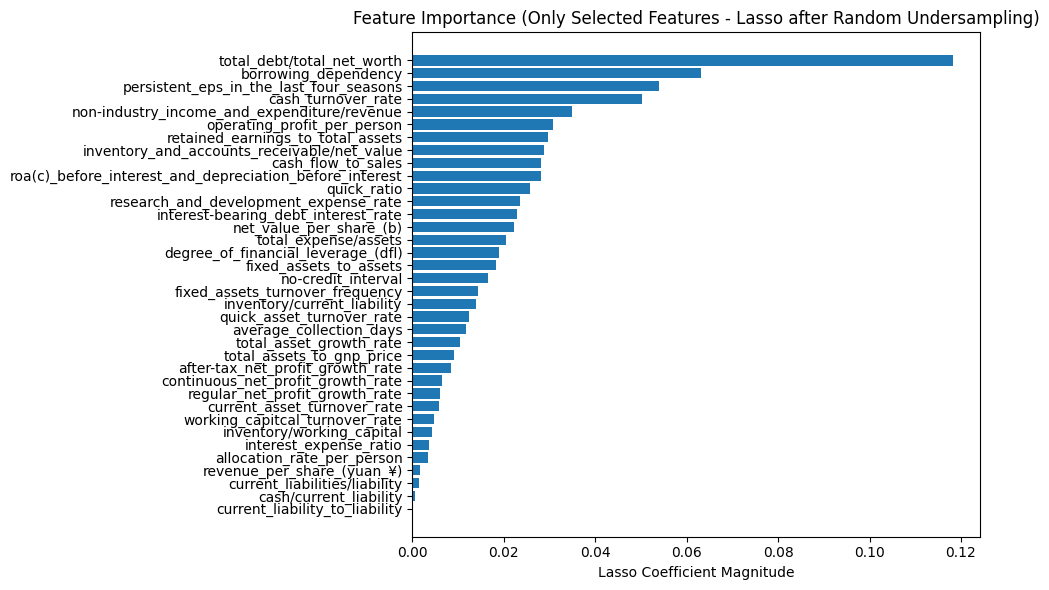

In [ ]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(selected_features_rus, importance)
plt.xlabel("Lasso Coefficient Magnitude")
plt.title("Feature Importance (Only Selected Features - Lasso after Random Undersampling)")
plt.tight_layout()
plt.show()

# Feature Selection - Random Forest + SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Fit Random Forest on SMOTE-resampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_smote, y_train_smote)

# Feature selection
selector = SelectFromModel(rf, threshold='mean', prefit=True)
selected_features1 = X.columns[selector.get_support()]

# Output
print("Selected features using Random Forest after SMOTE:")
print(selected_features1)
print("Number of selected features:", len(selected_features1))
selected_features_rf_smote = selected_features1


Selected features using Random Forest after SMOTE:
Index(['roa(c)_before_interest_and_depreciation_before_interest',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'pre-tax_net_interest_rate', 'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax)',
       'interest-bearing_debt_interest_rate', 'net_value_per_share_(b)',
       'persistent_eps_in_the_last_four_seasons',
       'per_share_net_profit_before_tax_(yuan_¥)', 'net_value_growth_rate',
       'quick_ratio', 'interest_expense_ratio', 'total_debt/total_net_worth',
       'debt_ratio_%', 'net_worth/assets', 'borrowing_dependency',
       'net_profit_before_tax/paid-in_capital', 'average_collection_days',
       'retained_earnings_to_total_assets', 'total_income/total_expense',
       'current_liability_to_equity', 'net_income_to_total_assets',
       'net_income_to_stockholder's_equity', 'liability_to_equity',
       'degree_of_financia

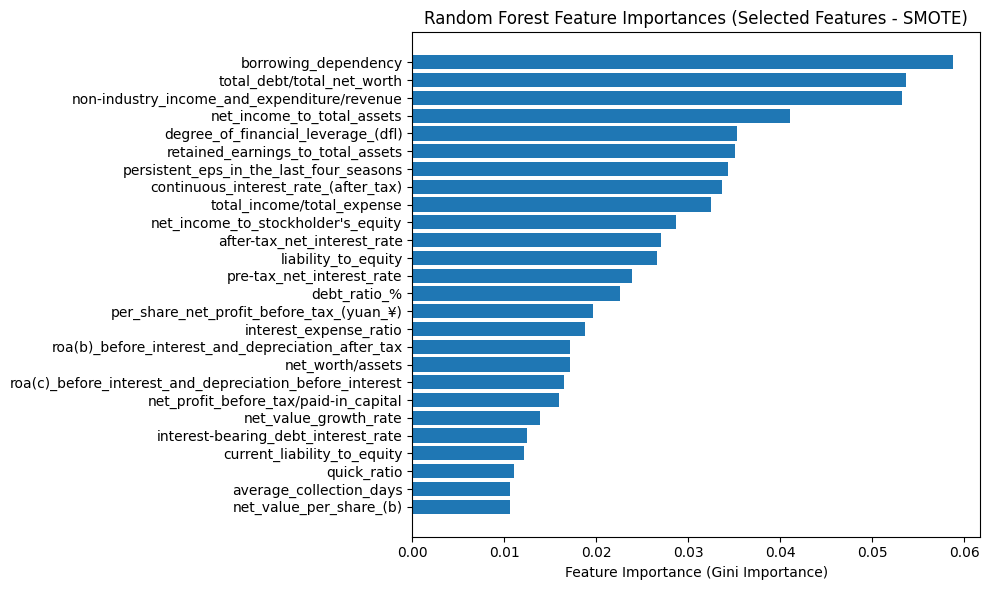

In [ ]:
# Get feature importances of the selected features
importances = rf.feature_importances_
selected_mask = selector.get_support()
selected_importances = importances[selected_mask]

# Sort selected features by importance
sorted_idx = np.argsort(selected_importances)
sorted_features = selected_features1[sorted_idx]
sorted_importances = selected_importances[sorted_idx]

# Plot

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance (Gini Importance)")
plt.title("Random Forest Feature Importances (Selected Features - SMOTE)")
plt.tight_layout()
plt.show()


# Feature Selection - Random Forest + Random Undersampling

In [ ]:
#  Fit Random Forest on undersampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_rus, y_train_rus)

#  Feature selection
selector = SelectFromModel(rf, threshold='mean', prefit=True)
selected_features2 = X.columns[selector.get_support()]

#  Output
print("Selected features using Random Forest after Undersampling:")
print(selected_features2)
print("Number of selected features:", len(selected_features2))
selected_features_rf_rus = selected_features2

Selected features using Random Forest after Undersampling:
Index(['roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax)', 'tax_rate_(a)',
       'net_value_per_share_(b)', 'persistent_eps_in_the_last_four_seasons',
       'per_share_net_profit_before_tax_(yuan_¥)', 'quick_ratio',
       'total_debt/total_net_worth', 'debt_ratio_%', 'net_worth/assets',
       'borrowing_dependency', 'net_profit_before_tax/paid-in_capital',
       'retained_earnings_to_total_assets', 'total_income/total_expense',
       'net_income_to_total_assets', 'net_income_to_stockholder's_equity',
       'liability_to_equity', 'degree_of_financial_leverage_(dfl)',
       'equity_to_liability'],
      dtype='object')
Number of selected features: 23


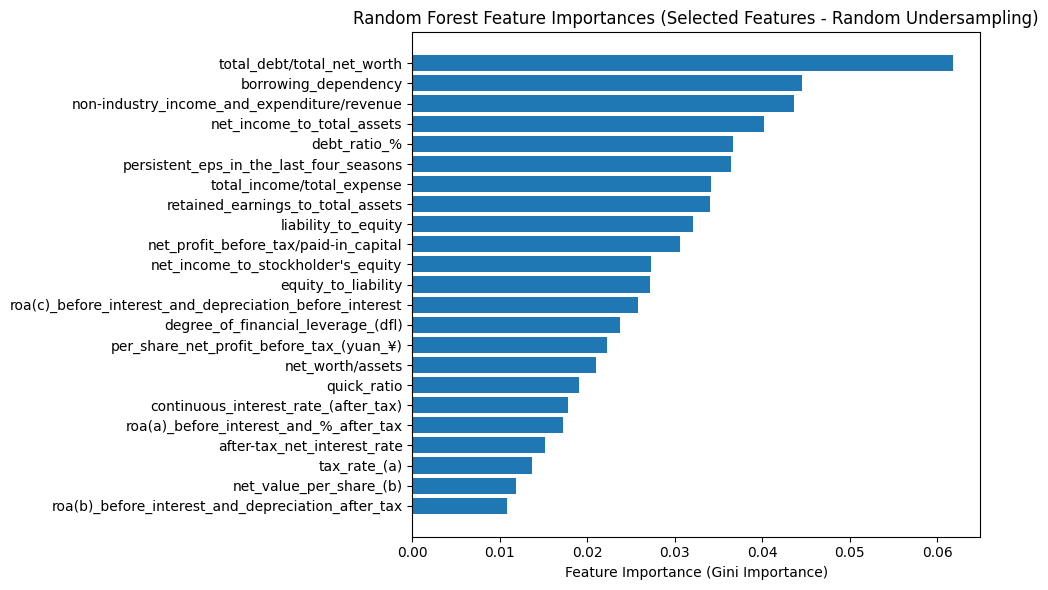

In [ ]:
# Get feature importances of the selected features
importances = rf.feature_importances_
selected_mask = selector.get_support()
selected_importances = importances[selected_mask]

# Sort selected features by importance
sorted_idx = np.argsort(selected_importances)
sorted_features = selected_features2[sorted_idx]
sorted_importances = selected_importances[sorted_idx]

# Plot


plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance (Gini Importance)")
plt.title("Random Forest Feature Importances (Selected Features - Random Undersampling)")
plt.tight_layout()
plt.show()

# Senario 1 : Lasso + Smote + Logistic Regression

In [ ]:

X_train_smote = pd.DataFrame(X_train_smote, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_selected = X_train_smote[selected_features_lasso_smote]
X_test_selected = X_test_scaled[selected_features_lasso_smote]

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_selected, y_train_smote)

# Predictions
y_train_pred = log_reg.predict_proba(X_train_selected)[:, 1]
y_test_pred = log_reg.predict_proba(X_test_selected)[:, 1]


#Threshold for classification
threshold = 0.5
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Metrics calculation
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_binary).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred_binary)
auc = roc_auc_score(y_test, y_test_pred)

print("\nClassification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")



Classification Metrics:
Sensitivity (Recall): 0.8039
Specificity: 0.8766
Precision: 0.2020
G-Mean: 0.8395
Accuracy: 0.8739
AUC: 0.9399


# Senario 2 : Lasso + Smote + Random Forest Classifier

In [ ]:

X_train_smote = pd.DataFrame(X_train_smote, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_selected = X_train_smote[selected_features_lasso_smote]
X_test_selected = X_test_scaled[selected_features_lasso_smote]

# Train Random Forest on selected features
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_selected, y_train_smote)

# Predict
y_train_pred = rf.predict(X_train_selected)
y_test_pred = rf.predict(X_test_selected)
y_test_pred_proba = rf.predict_proba(X_test_selected)[:,1]

# Metrics Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nRandom Forest Classification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")


Random Forest Classification Metrics:
Sensitivity (Recall): 0.4314
Specificity: 0.9787
Precision: 0.4400
G-Mean: 0.6497
Accuracy: 0.9582
AUC: 0.9288


# Senario 3 : Lasso + Smote + Guassian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train_selected = X_train_smote[selected_features_lasso_smote]
X_test_selected = X_test_scaled[selected_features_lasso_smote]
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train_smote)

# Predict
y_train_pred = gnb.predict(X_train_selected)
y_test_pred = gnb.predict(X_test_selected)
y_test_pred_proba = gnb.predict_proba(X_test_selected)[:,1]  # For AUC

# Metrics Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nGaussian Naive Bayes Classification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")


Gaussian Naive Bayes Classification Metrics:
Sensitivity (Recall): 0.7843
Specificity: 0.8644
Precision: 0.1835
G-Mean: 0.8234
Accuracy: 0.8614
AUC: 0.9146


# Senario 4 : Lasso + Random Undersampling + Logistic Regression

In [ ]:
X_train_rus = pd.DataFrame(X_train_rus, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_selected = X_train_rus[selected_features_lasso_rus]
X_test_selected = X_test_scaled[selected_features_lasso_rus]

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_selected, y_train_rus)

# Predictions
y_train_pred = log_reg.predict_proba(X_train_selected)[:, 1]
y_test_pred = log_reg.predict_proba(X_test_selected)[:, 1]

# classification
threshold = 0.5
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Metrics calculation
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_binary).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred_binary)
auc = roc_auc_score(y_test, y_test_pred)

print("\nClassification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")



Classification Metrics:
Sensitivity (Recall): 0.7843
Specificity: 0.8515
Precision: 0.1702
G-Mean: 0.8172
Accuracy: 0.8490
AUC: 0.9212


# Senario 5 : Lasso + Random Undersampling + Random Forest Classifier

In [ ]:

X_train_rus = pd.DataFrame(X_train_rus, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_selected = X_train_rus[selected_features_lasso_rus]
X_test_selected = X_test_scaled[selected_features_lasso_rus]
#  Train Random Forest on selected features
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_selected, y_train_rus)

# Predict
y_train_pred = rf.predict(X_train_selected)
y_test_pred = rf.predict(X_test_selected)
y_test_pred_proba = rf.predict_proba(X_test_selected)[:,1]  # For AUC

# Metrics Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nRandom Forest Classification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")



Random Forest Classification Metrics:
Sensitivity (Recall): 0.8431
Specificity: 0.8477
Precision: 0.1770
G-Mean: 0.8454
Accuracy: 0.8475
AUC: 0.9339


# Senario 6 : Lasso + Random Undersampling +  Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Train Gaussian Naive Bayes


X_train_selected = X_train_rus[selected_features_lasso_rus]
X_test_selected = X_test_scaled[selected_features_lasso_rus]
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train_rus)

# Predict
y_train_pred = gnb.predict(X_train_selected)
y_test_pred = gnb.predict(X_test_selected)
y_test_pred_proba = gnb.predict_proba(X_test_selected)[:,1]  # For AUC

# Metrics Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nGaussian Naive Bayes Classification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")



Gaussian Naive Bayes Classification Metrics:
Sensitivity (Recall): 0.8627
Specificity: 0.8134
Precision: 0.1522
G-Mean: 0.8377
Accuracy: 0.8152
AUC: 0.9362


# Senario 7 : RandomForest  + SMOTE + Logistic Regression

In [ ]:
# Linear Regression with Selected Features
X_train_selected = X_train_smote[selected_features_rf_smote]
X_test_selected = X_test_scaled[selected_features_rf_smote]

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_selected, y_train_smote)

# Predictions
y_train_pred = log_reg.predict_proba(X_train_selected)[:, 1]
y_test_pred = log_reg.predict_proba(X_test_selected)[:, 1]


threshold = 0.5
y_train_pred_class = (y_train_pred >= threshold).astype(int)
y_test_pred_class = (y_test_pred >= threshold).astype(int)

# Compute Confusion Matrix and Evaluation Metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_class).ravel()

# Sensitivity, Specificity, Precision, G-mean, Accuracy, AUC
sensitivity = tp / (tp + fn)  # Recall
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred_class)
auc = roc_auc_score(y_test, y_test_pred_class)

# Output the metrics
print("\nEvaluation Metrics for Linear Regression with Selected Features:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")



Evaluation Metrics for Linear Regression with Selected Features:
Sensitivity (Recall): 0.8039
Specificity: 0.8736
Precision: 0.1981
G-Mean: 0.8380
Accuracy: 0.8710
AUC: 0.8387


# Senario 8 : RandomForest Feature Selection  + SMOTE +  Random Forest Classifier

In [ ]:

X_train_selected = X_train_smote[selected_features_rf_smote]
X_test_selected = X_test_scaled[selected_features_rf_smote]
#  Train Random Forest on selected features
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_selected, y_train_smote)

# Predict
y_train_pred = rf.predict(X_train_selected)
y_test_pred = rf.predict(X_test_selected)
y_test_pred_proba = rf.predict_proba(X_test_selected)[:,1]  # For AUC

#  Metrics Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nRandom Forest Classification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")



Random Forest Classification Metrics:
Sensitivity (Recall): 0.5686
Specificity: 0.9551
Precision: 0.3295
G-Mean: 0.7369
Accuracy: 0.9406
AUC: 0.9337


# Senario 9 : RandomForest  + SMOTE + Guassian Naive Bayes Classifier

In [ ]:
X_train_selected = X_train_smote[selected_features_rf_smote]
X_test_selected = X_test_scaled[selected_features_rf_smote]
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train_smote)

#  Predict
y_train_pred = gnb.predict(X_train_selected)
y_test_pred = gnb.predict(X_test_selected)
y_test_pred_proba = gnb.predict_proba(X_test_selected)[:,1]  # For AUC

# Metrics Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nGaussian Naive Bayes Classification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")


Gaussian Naive Bayes Classification Metrics:
Sensitivity (Recall): 0.8235
Specificity: 0.8484
Precision: 0.1743
G-Mean: 0.8359
Accuracy: 0.8475
AUC: 0.9110


# Senario 10 : Random Forest + Random Undersampling + Logistic Regression

In [ ]:
# Linear Regression with Selected Features
X_train_selected = X_train_rus[selected_features_rf_rus]
X_test_selected = X_test_scaled[selected_features_rf_rus]

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_selected, y_train_rus)

# Predictions
y_train_pred = log_reg.predict_proba(X_train_selected)[:, 1]
y_test_pred = log_reg.predict_proba(X_test_selected)[:, 1]


# Convert continuous predictions to binary for classification metrics (e.g., 0.5 threshold)
threshold = 0.5
y_train_pred_class = (y_train_pred >= threshold).astype(int)
y_test_pred_class = (y_test_pred >= threshold).astype(int)

# Compute Confusion Matrix and Evaluation Metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_class).ravel()

# Sensitivity, Specificity, Precision, G-mean, Accuracy, AUC
sensitivity = tp / (tp + fn)  # Recall
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred_class)
auc = roc_auc_score(y_test, y_test_pred_class)

# Output the metrics
print("\nEvaluation Metrics for Linear Regression with Selected Features:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")



Evaluation Metrics for Linear Regression with Selected Features:
Sensitivity (Recall): 0.8235
Specificity: 0.8446
Precision: 0.1707
G-Mean: 0.8340
Accuracy: 0.8438
AUC: 0.8341


# Senario 11 : Random Forest + Random Undersampling  + Random Forest Classifier

In [ ]:
X_train_selected = X_train_rus[selected_features_rf_rus]
X_test_selected = X_test_scaled[selected_features_rf_rus]
# Train Random Forest on selected features
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_selected, y_train_rus)

# Predict
y_train_pred = rf.predict(X_train_selected)
y_test_pred = rf.predict(X_test_selected)
y_test_pred_proba = rf.predict_proba(X_test_selected)[:,1]  # For AUC

# Metrics Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nRandom Forest Classification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")


Random Forest Classification Metrics:
Sensitivity (Recall): 0.8235
Specificity: 0.8599
Precision: 0.1858
G-Mean: 0.8415
Accuracy: 0.8585
AUC: 0.9308


# Senario 12 : Random Forest + Random undersampling + Guassian Naive Bayes

In [ ]:
X_train_selected = X_train_rus[selected_features_rf_rus]
X_test_selected = X_test_scaled[selected_features_rf_rus]
gnb = GaussianNB()
gnb.fit(X_train_selected, y_train_rus)

#  Predict
y_train_pred = gnb.predict(X_train_selected)
y_test_pred = gnb.predict(X_test_selected)
y_test_pred_proba = gnb.predict_proba(X_test_selected)[:,1]  # For AUC

#  Metrics Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nGaussian Naive Bayes Classification Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")


Gaussian Naive Bayes Classification Metrics:
Sensitivity (Recall): 0.8431
Specificity: 0.8225
Precision: 0.1558
G-Mean: 0.8328
Accuracy: 0.8233
AUC: 0.9165


# Top 15 Lasso Features

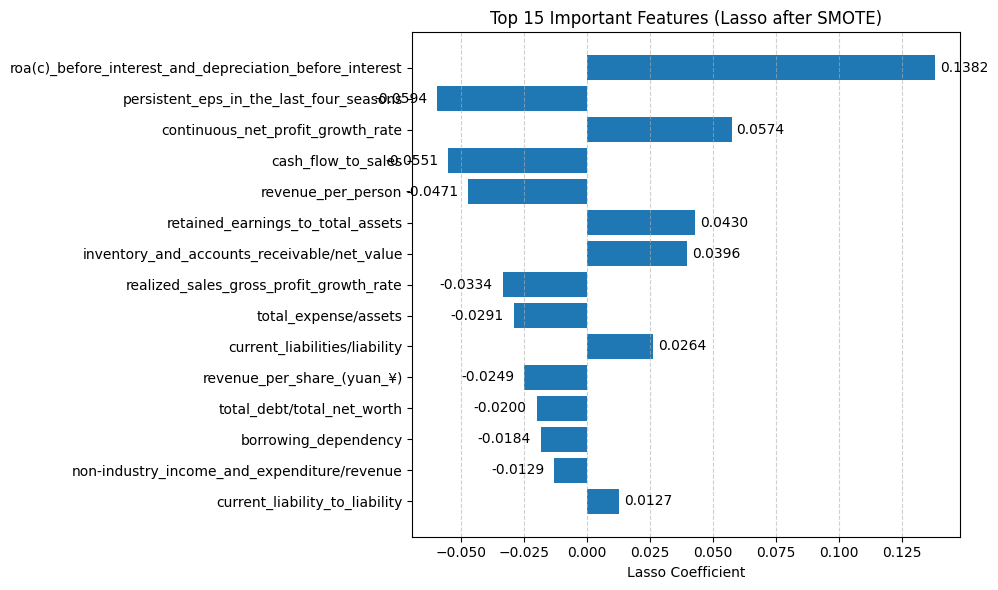

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume selected_features_lasso_smote and lasso are already defined
# selected_features_lasso_smote: array of selected feature names
# lasso: fitted Lasso model

# Get non-zero coefficients and match with selected features
coefficients = lasso.coef_[lasso.coef_ != 0]
abs_coeffs = np.abs(coefficients)

# Create DataFrame for feature importance
lasso_df = pd.DataFrame({
    'Feature': selected_features_lasso_smote,
    'Coefficient': coefficients,
    'Abs_Coefficient': abs_coeffs
})

# Select top 15 features by absolute coefficient magnitude
top_15_df = lasso_df.sort_values(by='Abs_Coefficient', ascending=False).head(15)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_15_df['Feature'][::-1], top_15_df['Coefficient'][::-1])
plt.xlabel("Lasso Coefficient")
plt.title("Top 15 Important Features (Lasso after SMOTE)")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Annotate coefficient values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002 if width > 0 else width - 0.025,
             bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center')

plt.tight_layout()
plt.show()


In [ ]:

top_15_features_lasso_smote = top_15_df['Feature'].tolist()

# Print the top 15 feature names
print("Top 15 features selected by Lasso (after SMOTE):")
for i, feature in enumerate(top_15_features_lasso_smote, start=1):
    print(f"{i}. {feature}")


Top 15 features selected by Lasso (after SMOTE):
1. roa(c)_before_interest_and_depreciation_before_interest
2. persistent_eps_in_the_last_four_seasons
3. continuous_net_profit_growth_rate
4. cash_flow_to_sales
5. revenue_per_person
6. retained_earnings_to_total_assets
7. inventory_and_accounts_receivable/net_value
8. realized_sales_gross_profit_growth_rate
9. total_expense/assets
10. current_liabilities/liability
11. revenue_per_share_(yuan_¥)
12. total_debt/total_net_worth
13. borrowing_dependency
14. non-industry_income_and_expenditure/revenue
15. current_liability_to_liability


# Summary Statistics

In [ ]:

X_train[top_15_features_lasso_smote].describe()

roa(c)_before_interest_and_depreciation_before_interest  \
count                                              5455.000000   
mean                                                  0.506050   
std                                                   0.051522   
min                                                   0.387973   
25%                                                   0.476698   
50%                                                   0.503144   
75%                                                   0.535538   
max                                                   0.624116   

       persistent_eps_in_the_last_four_seasons  \
count                              5455.000000   
mean                                  0.227201   
std                                   0.021911   
min                                   0.178548   
25%                                   0.214711   
50%                                   0.224733   
75%                                   0.239009   
max                                   0.274983   

       continuous_net_profit_growth_rate  cash_flow_to_sales  \
count                        5455.000000         5455.000000   
mean                            0.217600            0.671576   
std                             0.000042            0.000022   
min                             0.217517            0.671533   
25%                             0.217580            0.671565   
50%                             0.217598            0.671574   
75%                             0.217622            0.671587   
max                             0.217684            0.671619   

       revenue_per_person  retained_earnings_to_total_assets  \
count         5455.000000                        5455.000000   
mean             0.027018                           0.937058   
std              0.022000                           0.012890   
min              0.000000                           0.910524   
25%              0.010559                           0.931298   
50%              0.018804                           0.937753   
75%              0.036228                           0.944903   
max              0.073988                           0.965383   

       inventory_and_accounts_receivable/net_value  \
count                                  5455.000000   
mean                                      0.401702   
std                                       0.005783   
min                                       0.386681   
25%                                       0.397373   
50%                                       0.400146   
75%                                       0.404526   
max                                       0.415273   

       realized_sales_gross_profit_growth_rate  total_expense/assets  \
count                              5455.000000           5455.000000   
mean                                  0.022114              0.027003   
std                                   0.000085              0.016898   
min                                   0.021932              0.000000   
25%                                   0.022065              0.014508   
50%                                   0.022103              0.022578   
75%                                   0.022155              0.035770   
max                                   0.022286              0.067975   

       current_liabilities/liability  revenue_per_share_(yuan_¥)  \
count                    5455.000000                 5455.000000   
mean                        0.762480                    0.034471   
std                         0.205125                    0.024819   
min                         0.154412                    0.000000   
25%                         0.628032                    0.015692   
50%                         0.806953                    0.027603   
75%                         0.941922                    0.046259   
max                         1.000000                    0.092446   

       total_debt/total_net_worth  borrowing_dependency  \

# Bivariate Visualizations

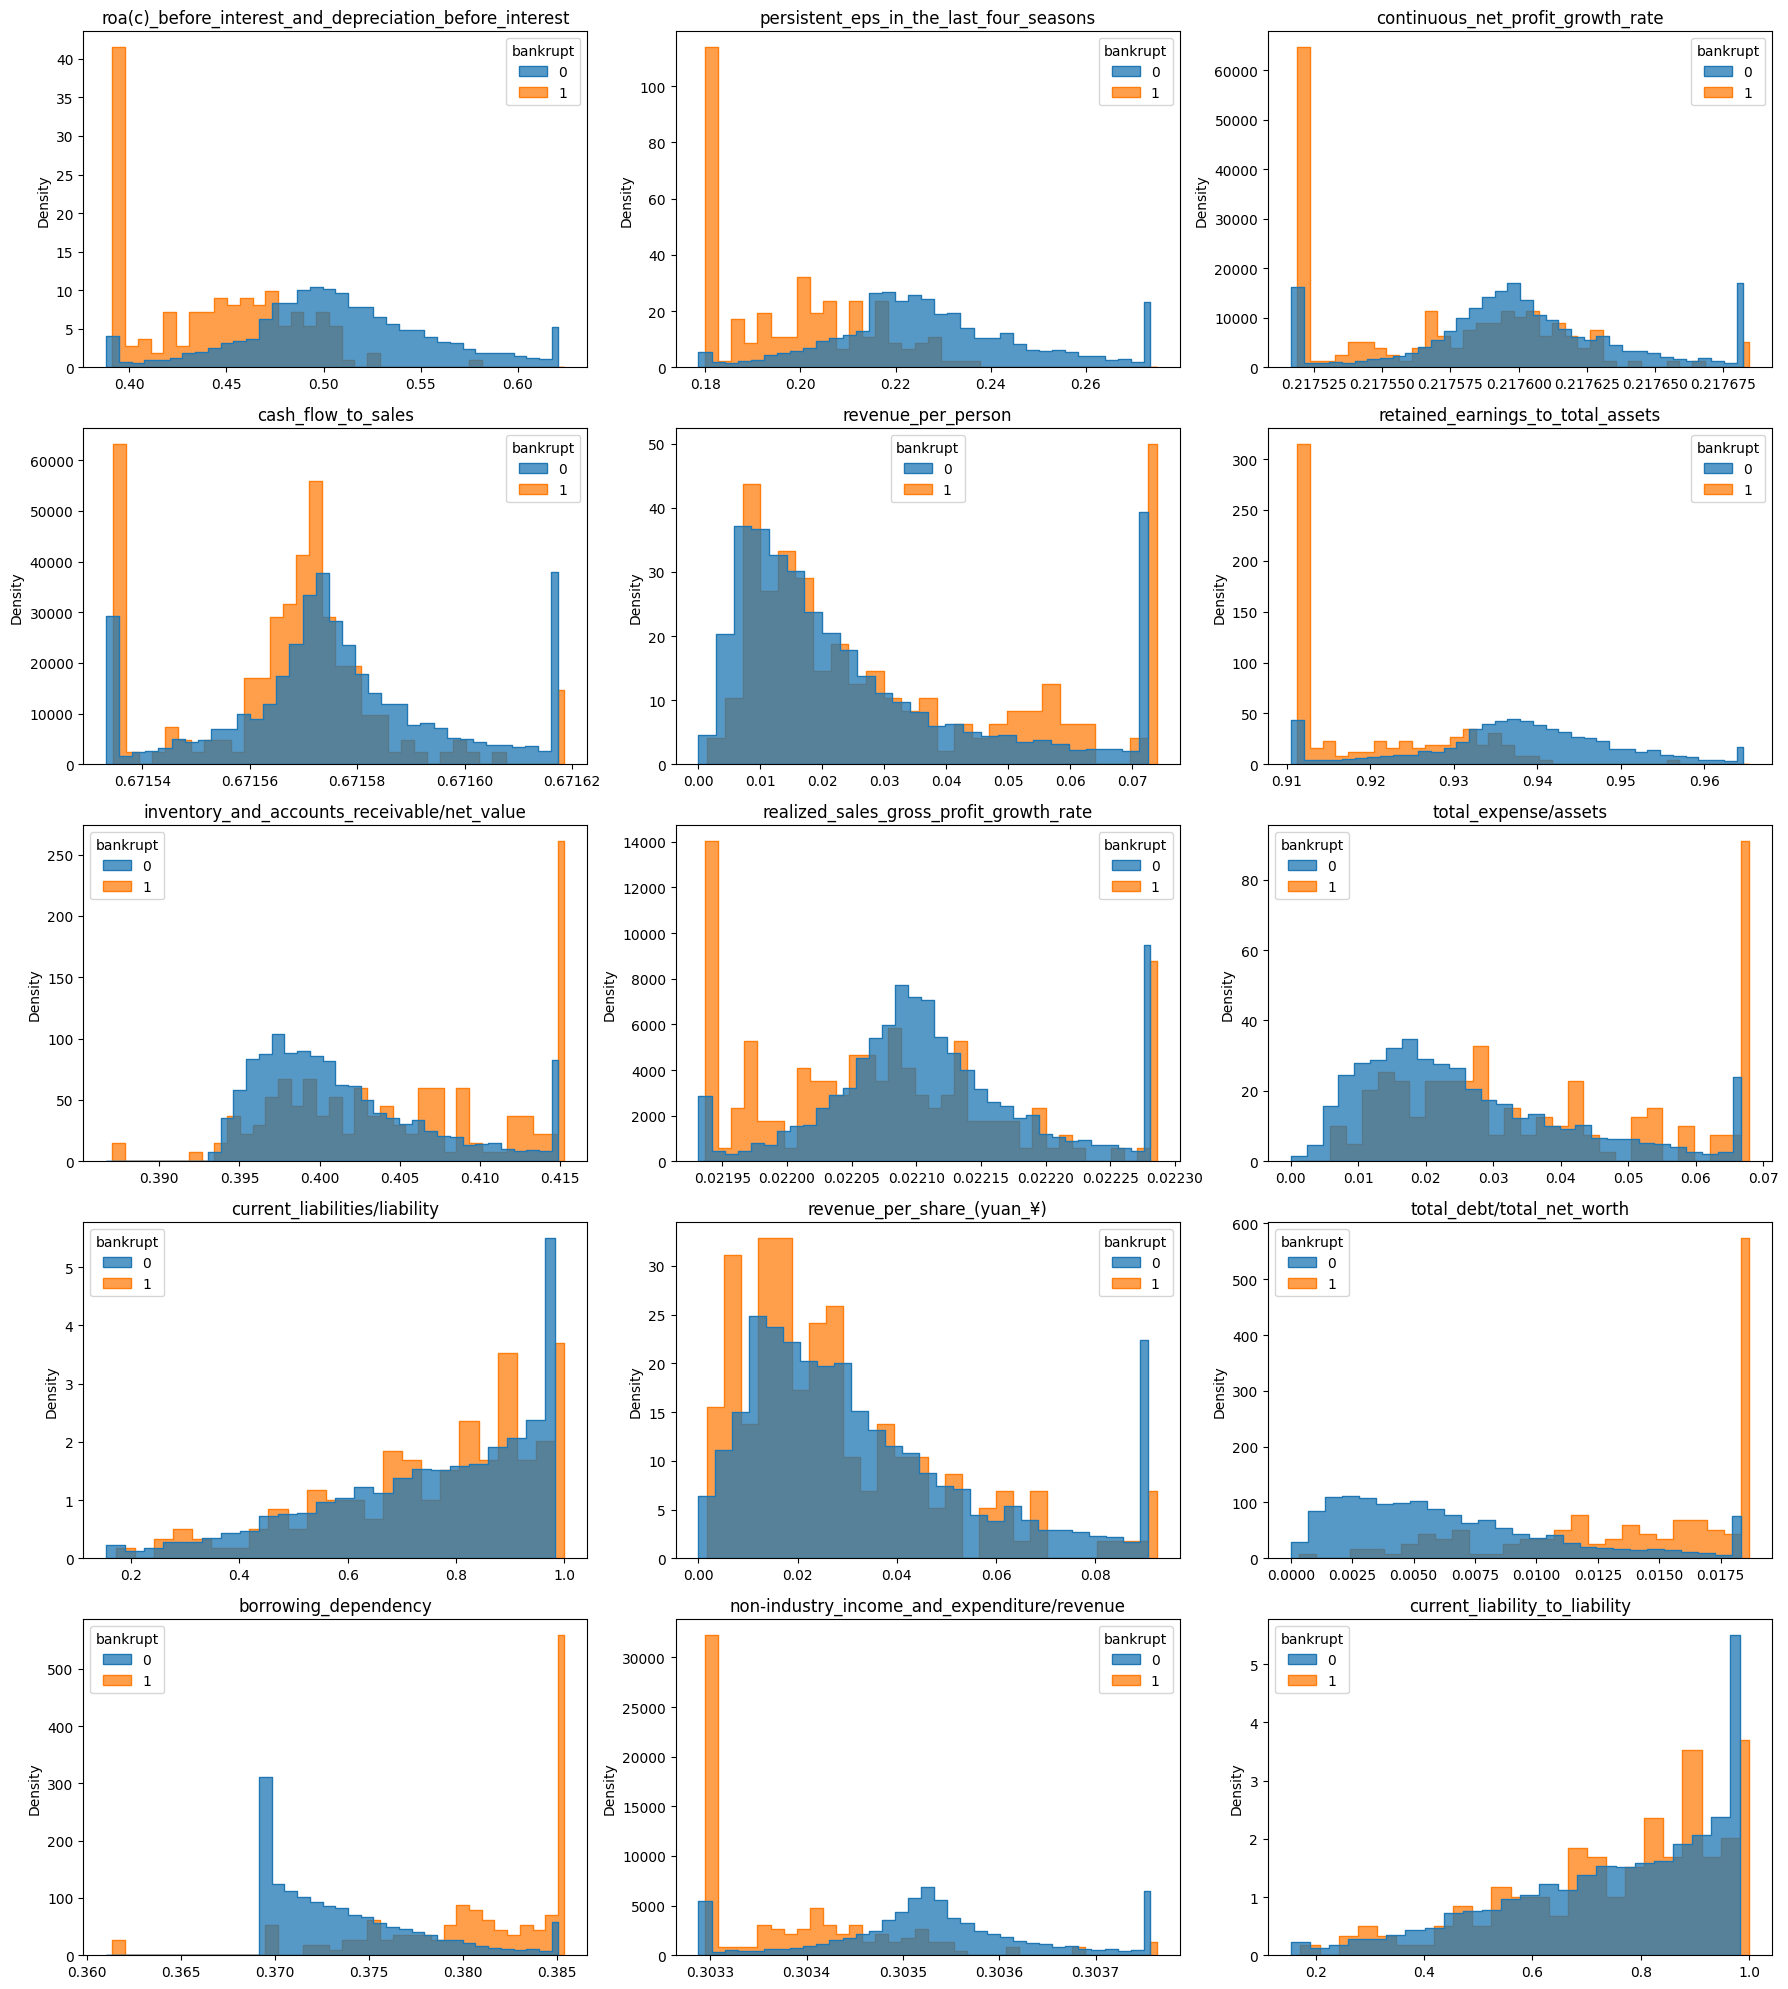

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine features and target into one DataFrame
top_15_data = X_train[top_15_features_lasso_smote].copy()
top_15_data['bankrupt'] = y_train.values  # Ensure alignment

# Plot all histograms in a grid layout (3x5 = 15 features)
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for i, feature in enumerate(top_15_features_lasso_smote):
    sns.histplot(data=top_15_data, x=feature, hue='bankrupt',
                 multiple='dodge', element='step', stat='density', common_norm=False,
                 ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()
